In [1]:
import pandas as pd
import pickle
from transformers import BertTokenizer
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import numpy as np

In [2]:
data_path = 'D:\\Data\\text_summarization\\'

In [3]:
with open(data_path + "hvg_tokenized.pickle", 'rb') as f:
    contents, summaries = pickle.load(f)

In [4]:
print("Number of articles:", len(contents))

Number of articles: 378625


In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
print("Vocabulary size:", tokenizer.vocab_size)


Vocabulary size: 119547


In [6]:
tokens = [token for tokenized_text_ids in [*contents, *summaries] for token in tokenized_text_ids]
print("Number of tokens in corpus:", len(tokens))

Number of tokens in corpus: 135206655


In [8]:
counter = Counter(tokens)
print(f"Used tokens: {len(counter.keys())}/{tokenizer.vocab_size} = {len(counter.keys())/tokenizer.vocab_size * 100:.2f}%")

Used tokens: 40318/119547 = 33.73%


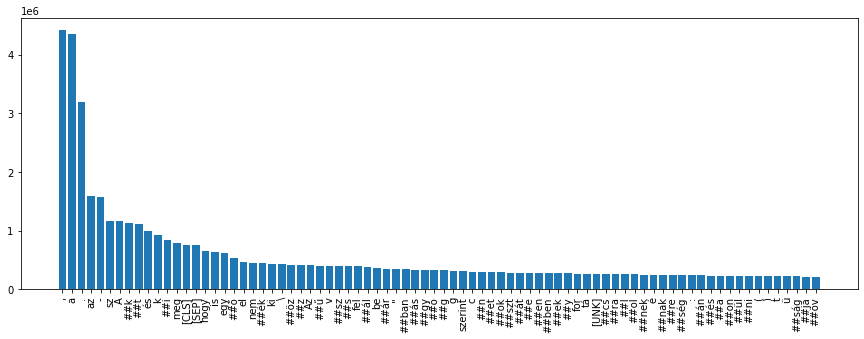

In [9]:
ms = counter.most_common()[:80]

plt.figure(figsize=(15,5))
plt.bar([tokenizer.convert_ids_to_tokens([id])[0] for id, count in ms], [count for id, count in ms]);
plt.xticks(rotation=90)
plt.show()

In [19]:
total_tokens = len(tokens)
total_tokens

135206655

In [23]:
covered = []
tokens_covered = 0
for token_count, (id, count) in enumerate(counter.most_common()):
    tokens_covered += count
    covered.append(tokens_covered / total_tokens)

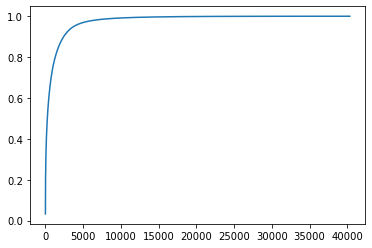

In [25]:
plt.plot(covered);

In [37]:
for i in range(1000, 10001, 1000):
    print(i, covered[i])

1000 0.7533829973088233
2000 0.8722557332699341
3000 0.9275859165364309
4000 0.9550648671842373
5000 0.9694195304217829
6000 0.9778051309678507
7000 0.9831774109048108
8000 0.9869086843395394
9000 0.9896061477151402
10000 0.991615109478154


In [40]:
with open(data_path+'used_token_ids.pickle', 'rb') as f:
    used_token_ids = pickle.load(f)

In [41]:
used_token_ids

[0,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 201,
 202,
 204,
 206,
 208,
 209,
 210,
 212,
 215,
 217,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 229,
 230,
 232,
 234,
 238,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 253,
 254,
 255,
 258,
 261,
 262,
 263,
 265,
 267,
 270,
 273,
 274,
 275,
 276,
 277,
 278,
 280,
 282,
 283,
 292,
 294,
 298,
 320,
 327,
 329,
 337,
 340,
 341,
 344,
 345,
 347,
 348,
 349,


In [48]:
token_ids = set([0, 100, 101, 102, 103, 104, 105])
for id, count in counter.most_common():
    token_ids.add(id)
    if len(token_ids)>=4000: break

In [49]:
token_ids = sorted(list(token_ids))

In [50]:
with open(data_path + "used_token_ids_4000.pickle", 'wb') as f:
    pickle.dump(token_ids, f)